### Importing dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import os
import pandas as pd

### Looking at the metadata

In [3]:
df = pd.read_csv('./UrbanSound8K/metadata/UrbanSound8K.csv')
df['duration'] = df['end'] - df['start']
max_duration = df['duration'].max()
max_samples = int(max_duration*22050)
df.describe()

,fsID,start,end,salience,fold,classID,duration
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877,3.607904
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544,0.973570
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000,0.054517
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000,4.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000,4.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000,4.000000


### Loading some files from audio folder with their labels mapped from csv file (metadata)

In [4]:
filename = './Audio/7061-6-0-0.wav'
source_folder = './Audio'
audios = [(source_folder + '/' + i ) for i in os.listdir(source_folder)]
classes = ['jackhammer','car_horn','street_music','dog_bark', 'jackhammer','engine_idling','children_playing',
          'jackhammer','gun_shot', 'jackhammer','drilling']
n = len(audios)
print(len(audios), len(classes))
print(audios)

11 11
['./Audio/203929-7-9-12.wav', './Audio/19026-1-0-0.wav', './Audio/21684-9-0-5.wav', './Audio/7383-3-0-0.wav', './Audio/203929-7-9-18.wav', './Audio/17592-5-0-0.wav', './Audio/15564-2-0-1.wav', './Audio/203929-7-9-15.wav', './Audio/7061-6-0-0.wav', './Audio/203929-7-9-17.wav', './Audio/17913-4-2-0.wav']


### Printing number of samples in each audio file

In [5]:
for i in audios:
    y, sr = librosa.load(i)
    print(y.shape[0])

88200
22883
88200
88200
88200
88200
88200
88200
49613
88200
42918


Clearly, the number of samples are different, and so is their duration. We need to resample them in order to get all audio files to a same duration. Because of Nyquist theorem, we resample the shorter clips with a higher sampling frequency to convert them to longer clips. 

### Plotting the amplitude-time graphs (before and after scaling)

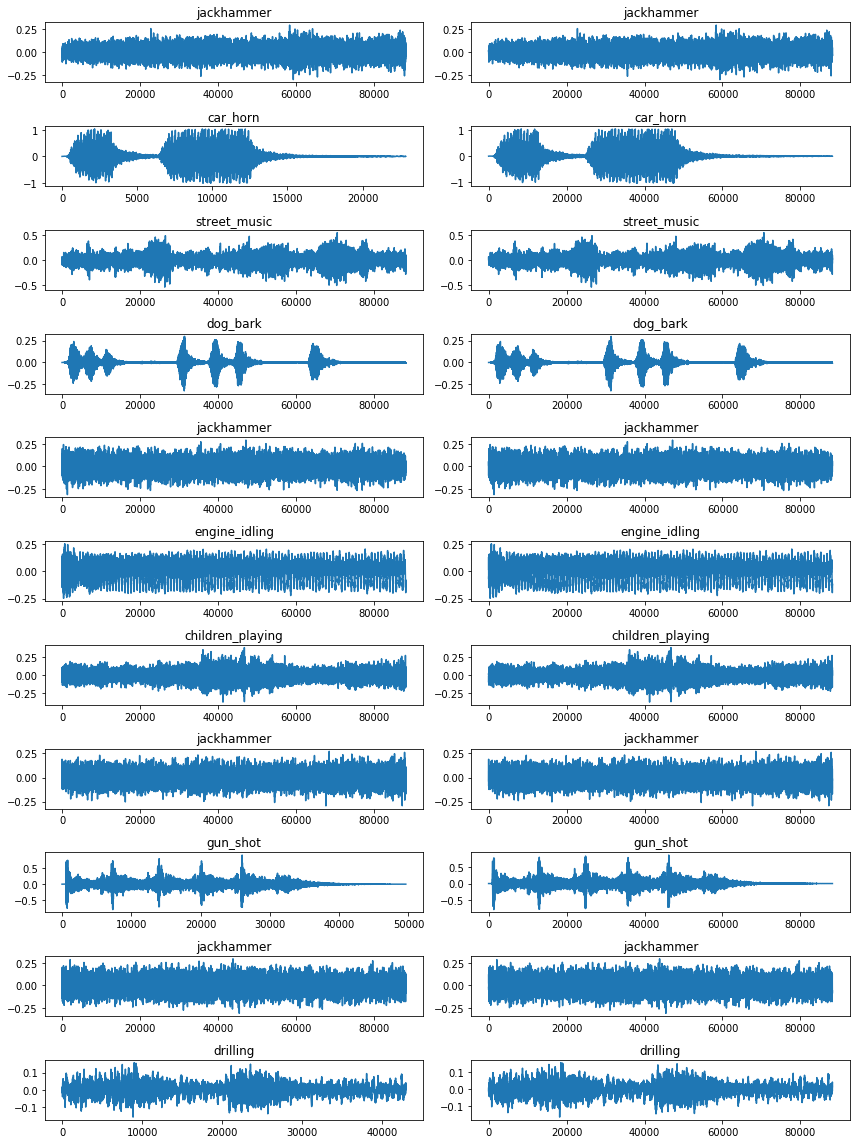

In [8]:
plt.figure(figsize = (12,16))
for i in range (len(audios)):
    y, sr = librosa.load(audios[i])
    plt.subplot(n,2,2*i+1)
    plt.plot(y)
    plt.title(classes[i])
    
    y = librosa.core.resample(y, sr, sr*max_samples/len(y))
    plt.subplot(n,2,2*i+2)
    plt.plot(y)
    plt.title(classes[i])

plt.tight_layout()    
plt.show()

### Plotting the melspectrograms before and after sampling

(256, 173) (256, 173)


/home/satan/anaconda3/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


(256, 45) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 97) (256, 173)
(256, 173) (256, 173)
(256, 84) (256, 173)


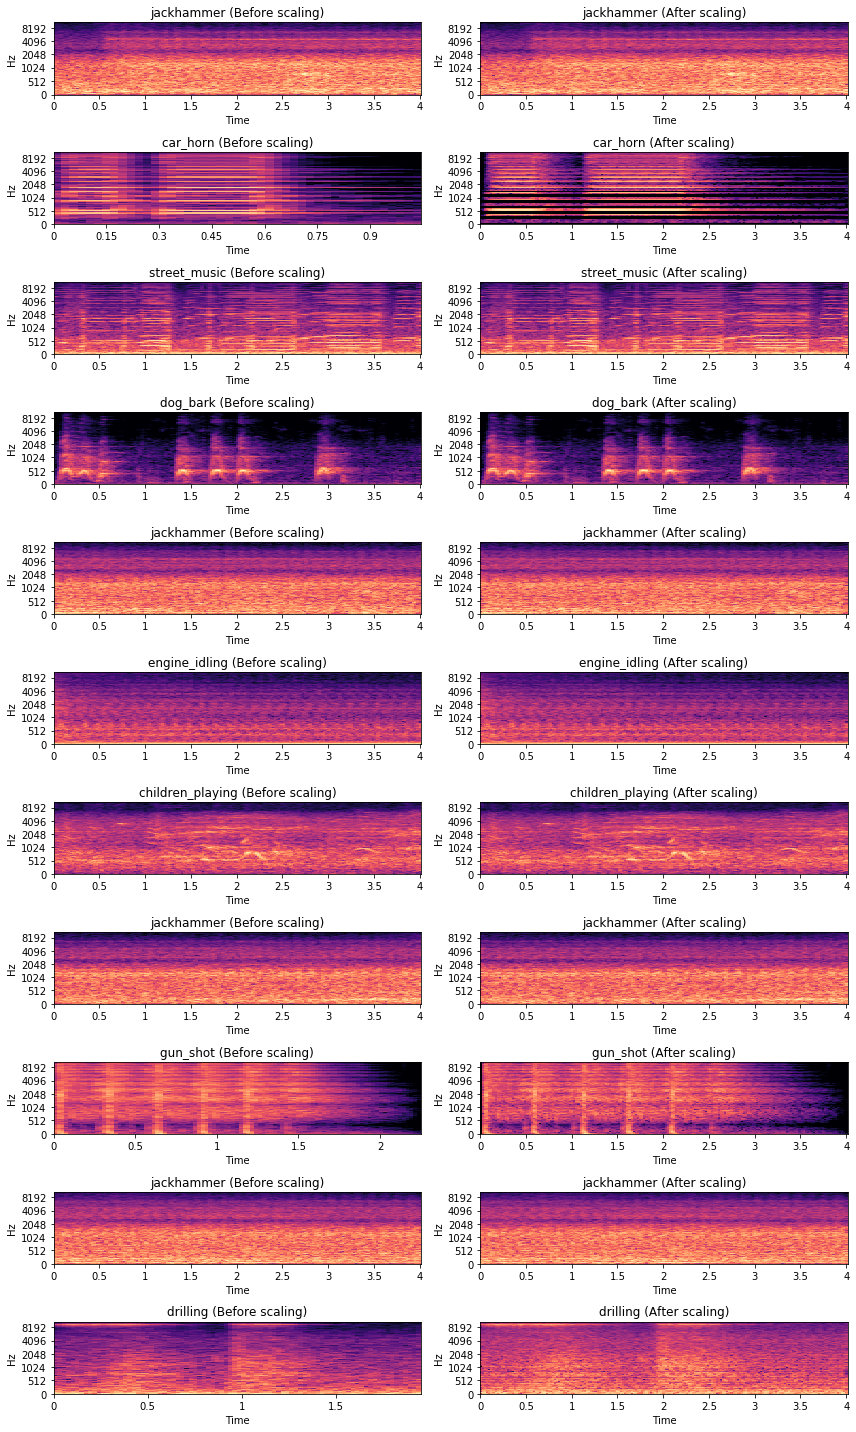

In [9]:
plt.figure(figsize = (12,20))

for i in range (len(audios)):
    y, sr = librosa.load(audios[i])
    scaled_sr = sr*max_samples//len(y)
    
    S = librosa.feature.melspectrogram(y, sr, n_mels = 256, fmax = 8000)
    plt.subplot(n,2,2*i+1)
    librosa.display.specshow(librosa.power_to_db(S, ref = np.max), y_axis = 'mel', x_axis='time')
    plt.title(classes[i]+ ' (Before scaling)')
    
    scaled_y = librosa.core.resample(y, sr, scaled_sr)
    
    scaled_S = librosa.feature.melspectrogram(y=scaled_y, sr= scaled_sr, n_mels = 256, fmax = 8000)
    plt.subplot(n,2,2*i+2)
    librosa.display.specshow(librosa.power_to_db(scaled_S, ref = np.max), y_axis = 'mel', x_axis='time')
    plt.title(classes[i]+ ' (After scaling)')
    print(S.shape, scaled_S.shape)
plt.tight_layout()    
plt.show()

Since melspectrogram is a feature that can be obtained as per our dimension requirement, and is not much affected by sampling, it is a good potential candidate for a feature.

### Plotting Chroma Constant-Q transform

(256, 84) (256, 173)
(256, 84) (256, 173)
(256, 84) (256, 173)
(256, 84) (256, 173)
(256, 84) (256, 173)
(256, 84) (256, 173)
(256, 84) (256, 173)
(256, 84) (256, 173)
(256, 84) (256, 173)
(256, 84) (256, 173)
(256, 84) (256, 173)


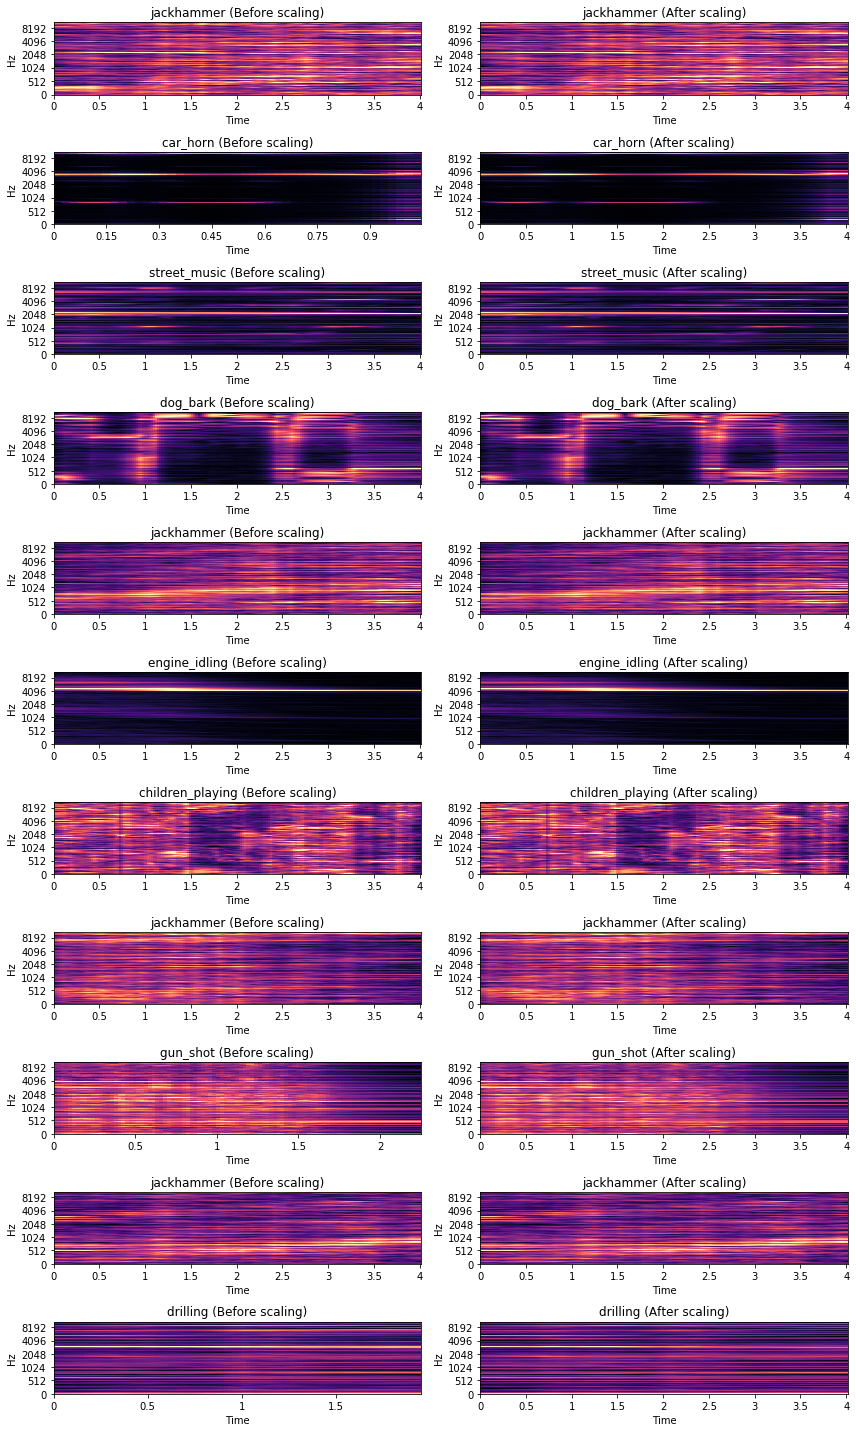

In [10]:
plt.figure(figsize = (12,20))

for i in range (len(audios)):
    y, sr = librosa.load(audios[i])
    scaled_sr = sr*max_samples//len(y)
    
    chroma_cqt = librosa.feature.chroma_cqt(y, sr, n_chroma = 256)
    plt.subplot(n,2,2*i+1)
    librosa.display.specshow(chroma_cqt, y_axis = 'mel', x_axis='time')
    plt.title(classes[i] + ' (Before scaling)')
    
    scaled_y = librosa.core.resample(y, sr, scaled_sr)
    
    scaled_chroma_cqt = librosa.feature.chroma_cqt(y=scaled_y, sr= scaled_sr, n_chroma = 256)
    plt.subplot(n,2,2*i+2)
    librosa.display.specshow(scaled_chroma_cqt, y_axis = 'mel', x_axis='time')
    plt.title(classes[i]+ ' (After scaling)')
    print(S.shape, scaled_S.shape)
plt.tight_layout()    
plt.show()

Similar to melspectrogram, this is also a good candidate (one plane)

In [11]:
### Plotting MFCC (mel frequence cepstral coefficients)

In [ ]:
plt.figure(figsize = (12,20))

for i in range (len(audios)):
    y, sr = librosa.load(audios[i])
    scaled_sr = sr*max_samples//len(y)
    
    S = librosa.feature.melspectrogram(y, sr, n_mels = 256, fmax = 8000)
    mfcc = librosa.feature.mfcc(S = librosa.power_to_db(S))
    plt.subplot(n,2,2*i+1)
    librosa.display.specshow(mfcc, y_axis = 'mel', x_axis='time')
    plt.title(classes[i] + ' (Before scaling)')
    
    scaled_y = librosa.core.resample(y, sr, scaled_sr)
    scaled_S = librosa.feature.melspectrogram(y=scaled_y, sr= scaled_sr, n_mels = 256, fmax = 8000)
    
    scaled_mfcc = librosa.feature.mfcc(S = librosa.power_to_db(scaled_S))
    plt.subplot(n,2,2*i+2)
    librosa.display.specshow(scaled_mfcc, y_axis = 'mel', x_axis='time')
    plt.title(classes[i]+ ' (After scaling)')
    print(S.shape, scaled_S.shape)
plt.tight_layout()    
plt.show()

(256, 173) (256, 173)


/home/satan/anaconda3/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


(256, 45) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 173) (256, 173)
(256, 97) (256, 173)
(256, 173) (256, 173)
(256, 84) (256, 173)


Out third plane in the features